# **3. Sentiment Analysis**

In [1]:
import pandas as pd

# Load the dataset
file_path = 'tech_tweets.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,created_at,file_name,followers,friends,group_name,location,retweet_count,screenname,search_query,text,twitter_id,username,polarity,partition_0,partition_1
0,10/5/2020 8:44,Nvidia,41,410,Nvidia,sydney,0,jyolyu,#Nvidia,#NVIDIA #GauGAN is actually a good tool to pra...,1.313040e+18,N0%Ice,0.4404,Technology,Nvidia
1,10/5/2020 8:44,Nvidia,367,267,Nvidia,PARIS,0,MiClaverie,#Nvidia,"#BullSequana X2415, the first #supercomputer b...",1.313040e+18,MichÃ¨le Claverie,0.0000,Technology,Nvidia
2,10/5/2020 8:41,Nvidia,14,104,Nvidia,Japan,0,_stingraze,#Nvidia,I'm going to attend GTC 2020 tonight! Excited....,1.313040e+18,Tsubasa Kato,0.4003,Technology,Nvidia
3,10/5/2020 8:28,Nvidia,18286,941,Nvidia,NaN,0,gamingonlinux,#Nvidia,#NVIDIA delays launch of #GeForce RTX 3070 unt...,1.313030e+18,GamingOnLinux ðŸ§,0.0000,Technology,Nvidia
4,10/5/2020 8:18,Nvidia,42,84,Nvidia,"Paris, France",0,anupdshetty,#Nvidia,"#BullSequana X2415, the first #supercomputer b...",1.313030e+18,Anup Shetty,0.0000,Technology,Nvidia


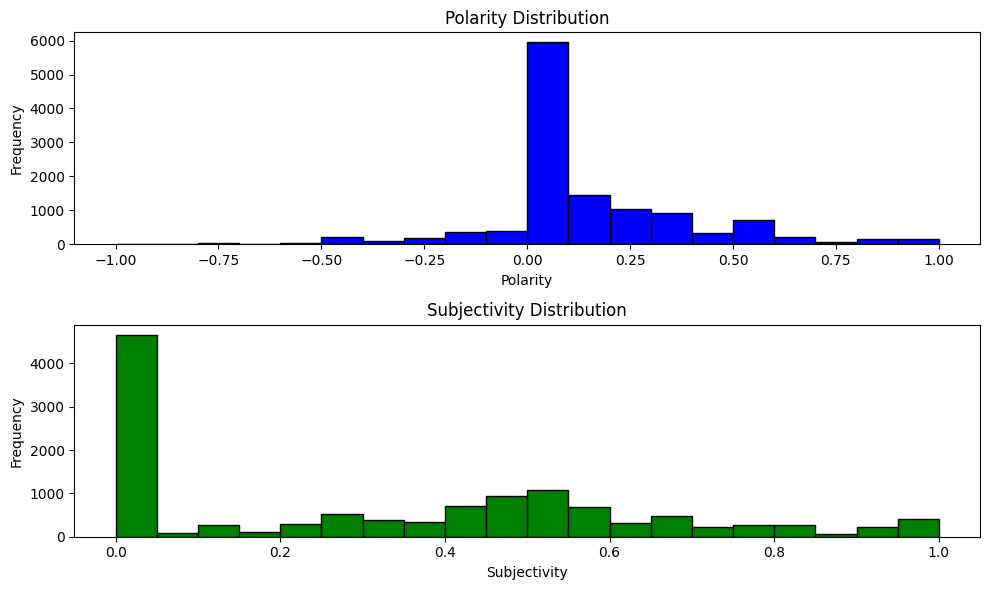

,text,polarity,polarity_new,subjectivity
0,#NVIDIA #GauGAN is actually a good tool to pra...,0.4404,0.700,0.600000
1,"#BullSequana X2415, the first #supercomputer b...",0.0000,0.250,0.277778
2,I'm going to attend GTC 2020 tonight! Excited....,0.4003,0.375,0.750000
3,#NVIDIA delays launch of #GeForce RTX 3070 unt...,0.0000,0.000,0.000000
4,"#BullSequana X2415, the first #supercomputer b...",0.0000,0.250,0.277778


In [2]:
from textblob import TextBlob
import matplotlib.pyplot as plt

# Perform sentiment analysis
data['sentiment'] = data['text'].apply(lambda x: TextBlob(x).sentiment)

# Extract polarity and subjectivity
data['polarity_new'] = data['sentiment'].apply(lambda x: x.polarity)
data['subjectivity'] = data['sentiment'].apply(lambda x: x.subjectivity)

# Plotting the results
plt.figure(figsize=(10, 6))

# Polarity histogram
plt.subplot(2, 1, 1)
plt.hist(data['polarity_new'], bins=20, color='blue', edgecolor='black')
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Subjectivity histogram
plt.subplot(2, 1, 2)
plt.hist(data['subjectivity'], bins=20, color='green', edgecolor='black')
plt.title('Subjectivity Distribution')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Display first few rows with new sentiment analysis columns
data[['text', 'polarity', 'polarity_new', 'subjectivity']].head()

**Label the Sentiments:** Based on the polarity_new values, label each tweet as 'positive', 'negative', or 'neutral'.

In [3]:
# Define a function to categorize polarity into sentiments
def label_sentiment(row):
    if row['polarity_new'] > 0.1:
        return 'positive'
    elif row['polarity_new'] < -0.1:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to the dataset
data['sentiment_label'] = data.apply(label_sentiment, axis=1)

# Check the distribution of the sentiment labels
sentiment_distribution = data['sentiment_label'].value_counts()
sentiment_distribution

neutral     6410
positive    5056
negative     879
Name: sentiment_label, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Preprocessing and Feature Extraction

# Split the data into features and labels
X = data['text']
y = data['sentiment_label']

# Encode the labels into numerical format
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Use TF-IDF Vectorizer for text feature extraction
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

X_train_tfidf.shape, X_test_tfidf.shape

((9876, 1000), (2469, 1000))

In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Function to train and evaluate models
def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Predict on test data
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Model: {name}")
        print(f"Accuracy: {accuracy:.4f}")
        print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
        print("--------------------------------------------------")

# Train and evaluate models
train_and_evaluate(models, X_train_tfidf, y_train, X_test_tfidf, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.7699
              precision    recall  f1-score   support

    negative       0.51      0.14      0.22       158
     neutral       0.76      0.85      0.80      1299
    positive       0.80      0.76      0.78      1012

    accuracy                           0.77      2469
   macro avg       0.69      0.58      0.60      2469
weighted avg       0.76      0.77      0.76      2469

--------------------------------------------------
Model: Naive Bayes
Accuracy: 0.6869
              precision    recall  f1-score   support

    negative       0.61      0.09      0.15       158
     neutral       0.77      0.66      0.71      1299
    positive       0.62      0.82      0.71      1012

    accuracy                           0.69      2469
   macro avg       0.67      0.52      0.52      2469
weighted avg       0.70      0.69      0.67      2469

--------------------------------------------------
Model: SVM
Accuracy: 0.7878
              precision    r

Here's a summary of the models' performances based on accuracy:

* Random Forest: Accuracy = 0.8036
* SVM: Accuracy = 0.7878
* Gradient Boosting: Accuracy = 0.7797
* Naive Bayes: Accuracy = 0.6869

Based on accuracy, the Random Forest model performed the best. However, it's also important to consider other metrics like precision, recall, and F1-score, especially in a multi-class classification scenario where class imbalance might be an issue.

In [6]:
import joblib

rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)

# Save the model
joblib.dump(rf_model, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [3]:

import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
import joblib
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
file_path = 'tech_tweets.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)

# Preprocessing: Define a function to clean the text data
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs, special characters, and numbers
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+', '', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stopwords.words('english')])
    return text

# Apply preprocessing to the text
data['text'] = data['text'].apply(preprocess_text)

# Labeling sentiment based on polarity
data['sentiment'] = data['polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'], test_size=0.2, random_state=42)

# Creating a text classification pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1,2))),  # Adjusted TF-IDF settings
    ('classifier', MultinomialNB())  # Using MultinomialNB instead of RandomForest
])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
predictions = pipeline.predict(X_test)
print(classification_report(y_test, predictions))

# Save the model
joblib.dump(pipeline, 'enhanced_sentiment_analysis_model.joblib')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


              precision    recall  f1-score   support

    negative       0.62      0.15      0.24       329
     neutral       0.81      0.64      0.71      1274
    positive       0.64      0.90      0.75      1262

    accuracy                           0.70      2865
   macro avg       0.69      0.56      0.56      2865
weighted avg       0.71      0.70      0.67      2865



['enhanced_sentiment_analysis_model.joblib']